# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.8.3'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

184

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **9th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{

3

: 

['Tanzania', 'Dominica', 'Myanmar']

,
 

4

: 

['Trinidad and Tobago', 'Belize']

,
 

5

: 

[

'Lebanon'

, 

'Seychelles'

, 

'Namibia'

, 

'Tunisia'

, 

'Brunei'

, 

'Lesotho'

,
     

'Antigua and Barbuda'

, 

'Papua New Guinea'

, 

'Libya'

, 

'Grenada'

, 

'Bahamas'

,
     

'Fiji'

, 

'Mauritius'

]

,
 

6

: 

[

'Monaco'

, 

'Gambia'

, 

'Kazakhstan'

, 

'Jordan'

, 

'Kyrgyzstan'

, 

'Ireland'

,
     

'Netherlands'

, 

'Sao Tome and Principe'

, 

'Guyana'

, 

'Yemen'

, 

'Rwanda'

,
     

'Paraguay'

, 

'Norway'

, 

'Vietnam'

, 

'Angola'

, 

'Croatia'

,
     

'Central African Republic'

, 

'Malta'

]

,
 

7

: 

[

'Botswana'

, 

'Uganda'

, 

'New Zealand'

, 

'Costa Rica'

, 

'South Sudan'

,
     

'Philippines'

, 

'Colombia'

, 

'San Marino'

, 

'Comoros'

, 

'Barbados'

, 

'Malawi'

,
     

'Zimbabwe'

, 

'Nepal'

, 

'Eritrea'

, 

'Ethiopia'

, 

'Saint Lucia'

, 

'Taiwan'

,
     

'Thailand'

, 

'Venezuela'

, 

'Jamaica'

, 

'Palestine'

, 

'Cambodia'

, 

'Madagascar'

,
     

'Morocco'

, 

'Kosovo'

, 

'Equatorial Guinea'

, 

'Mongolia'

, 

'Liechtenstein'

,
     

'Zambia'

, 

'Kenya'

, 

'Saint Vincent and the Grenadines'

, 

'Bhutan'

, 

'Cyprus'

,
     

'Iceland'

, 

'Montenegro'

, 

'Australia'

, 

'Spain'

, 

'Syria'

, 

'India'

,
     

'Slovakia'

]

,
 

8

: 

[

'Chad'

, 

'Mozambique'

, 

'Haiti'

, 

'Oman'

, 

'Niger'

, 

'Congo'

, 

'Burundi'

,
     

'Guatemala'

, 

'Uruguay'

, 

'Nicaragua'

, 

'Slovenia'

, 

'Greece'

, 

'Israel'

,
     

'Maldives'

, 

'South Africa'

, 

'Ghana'

, 

'Tajikistan'

, 

'Sudan'

, 

'Suriname'

,
     

'Argentina'

, 

'Sri Lanka'

, 

'Djibouti'

, 

'Afghanistan'

, 

'Bermuda'

, 

'Cameroon'

,
     

'Japan'

, 

'Guinea-Bissau'

, 

'Luxembourg'

]

,
 

9

: 

[

'Germany'

, 

'Czech Republic'

, 

'Qatar'

, 

'Armenia'

, 

'Belarus'

, 

'Mauritania'

,
     

'Cape Verde'

, 

'El Salvador'

, 

'Azerbaijan'

, 

'Ukraine'

, 

'Georgia'

,
     

'Singapore'

, 

'Iraq'

, 

'Chile'

, 

'Austria'

, 

'Bosnia and Herzegovina'

,
     

'Liberia'

, 

'Finland'

, 

'Sierra Leone'

, 

'Swaziland'

, 

'Romania'

, 

'Benin'

,
     

'Uzbekistan'

, 

'Somalia'

, 

'Korea, South'

, 

'Andorra'

, 

'China'

]

,
 

10

: 

[

'Senegal'

, 

'Switzerland'

, 

'Albania'

, 

'Panama'

, 

'Saudi Arabia'

, 

'Serbia'

,
      

'Egypt'

, 

'Indonesia'

, 

'Ecuador'

, 

'Cuba'

, 

'Lithuania'

, 

'Pakistan'

, 

'Mali'

,
      

'Latvia'

, 

'Togo'

, 

'Poland'

, 

'Malaysia'

, 

'Honduras'

, 

'Bulgaria'

, 

'Gabon'

,
      

'Macedonia'

, 

'Belgium'

, 

'Canada'

]

,
 

11

: 

[

'Mexico'

, 

'Italy'

, 

'Portugal'

, 

'Turkey'

, 

'Dominican Republic'

,
      

'Burkina Faso'

, 

'Bangladesh'

, 

'Iran'

, 

'Estonia'

, 

'Kuwait'

, 

'Guinea'

,
      

'Moldova'

, 

'Denmark'

, 

'Nigeria'

, 

'Algeria'

, 

'Bolivia'

, 

'Peru'

, 

'Brazil'

]

,
 

12

: 

['United States', 'France', 'Bahrain', 'United Arab Emirates', 'Hungary']

,
 

13

: 

['Russia']

}

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=11)
# The number of countries
len(analyser.countries)

24

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{

11

: 

[

'Mexico'

, 

'Italy'

, 

'Portugal'

, 

'Turkey'

, 

'Dominican Republic'

,
      

'Burkina Faso'

, 

'Bangladesh'

, 

'Iran'

, 

'Estonia'

, 

'Kuwait'

, 

'Guinea'

,
      

'Moldova'

, 

'Denmark'

, 

'Nigeria'

, 

'Algeria'

, 

'Bolivia'

, 

'Peru'

, 

'Brazil'

]

,
 

12

: 

['United States', 'France', 'Bahrain', 'United Arab Emirates', 'Hungary']

,
 

13

: 

['Russia']

}

In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Russia  0th    Past  12Feb2020  06May2020   330457362
        1st    Past  07May2020  15May2020   330457362
        2nd    Past  16May2020  23May2020   330457362
        3rd    Past  24May2020  01Jun2020   330457362
        4th    Past  02Jun2020  11Jun2020   330457362
        5th    Past  12Jun2020  20Jun2020   330457362
        6th    Past  21Jun2020  30Jun2020   330457362
        7th    Past  01Jul2020  11Jul2020   330457362
        8th    Past  12Jul2020  24Jul2020   330457362
        9th    Past  25Jul2020  07Aug2020   330457362
        10th   Past  08Aug2020  21Aug2020   330457362
        11th   Past  22Aug2020  05Sep2020   330457362
        12th   Past  06Sep2020  20Sep2020   330457362

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	ITA,  3rd phase (09Apr2020 - 18Apr2020): finished  259 trials in 0 min  5 sec

	DOM,  1st phase (10May2020 - 04Jun2020): finished  253 trials in 0 min  5 sec

	TUR,  0th phase (24Mar2020 - 16Apr2020): finished 2007 trials in 1 min  0 sec

	PRT,  8th phase (11Aug2020 - 27Aug2020): finished 1994 trials in 1 min  0 sec

	USA,  0th phase (09Feb2020 - 18Apr2020): finished 1940 trials in 1 min  0 sec

	EST,  8th phase (22Aug2020 - 03Sep2020): finished  483 trials in 0 min 10 sec

	MEX,  2nd phase (11Jun2020 - 23Jun2020): finished 2007 trials in 1 min  0 sec

	PER,  5th phase (18Jul2020 - 30Jul2020): finished 2006 trials in 1 min  0 sec

	GIN,  3rd phase (25May2020 - 07Jun2020): finished 1998 trials in 1 min  0 sec

	GIN,  9th phase (18Aug2020 - 02Sep2020): finished 2012 trials in 1 min  0 sec

	DNK, 10th phase (09Sep2020 - 20Sep2020): finished 2003 trials in 1 min  0 sec

	BRA,  9th phase (25Aug2020 - 03Sep2020): finished  481 trials in 0 min 10 sec

	ARE,  5th phase (19Jun2020 - 01Jul2020): finished 1038 trials in 0 min 25 sec

	DOM,  6th phase (25Jul2020 - 01Aug2020): finished 1205 trials in 0 min 30 sec

	BFA,  7th phase (23Jul2020 - 12Aug2020): finished 2010 trials in 1 min  0 sec

	HUN,  9th phase (13Aug2020 - 25Aug2020): finished  254 trials in 0 min  5 sec

	BOL,  7th phase (10Aug2020 - 17Aug2020): finished  257 trials in 0 min  5 sec

	FRA,  4th phase (22Apr2020 - 04May2020): finished 2004 trials in 1 min  0 sec

	TUR,  3rd phase (09May2020 - 22May2020): finished 1991 trials in 1 min  0 sec

	KWT,  1st phase (13May2020 - 27May2020): finished 2001 trials in 1 min  0 sec

	BGD,  7th phase (30Jul2020 - 12Aug2020): finished 1204 trials in 0 min 30 sec

	USA,  8th phase (05Aug2020 - 14Aug2020): finished  480 trials in 0 min 10 sec

	TUR, 10th phase (06Sep2020 - 20Sep2020): finished  256 trials in 0 min  5 sec

	EST,  7th phase (02Aug2020 - 21Aug2020): finished 2013 trials in 1 min  0 sec

	MDA,  2nd phase (09Jun2020 - 22Jun2020): finished 2010 trials in 1 min  0 sec

	BOL,  9th phase (26Aug2020 - 09Sep2020): finished 2016 trials in 1 min  0 sec

	EST,  0th phase (15Mar2020 - 07Apr2020): finished 1971 trials in 1 min  0 sec

	TUR,  6th phase (28Jun2020 - 14Jul2020): finished  450 trials in 0 min 10 sec

	BGD,  1st phase (27May2020 - 12Jun2020): finished 1963 trials in 1 min  0 sec

	IRN,  7th phase (16Jul2020 - 30Jul2020): finished 1970 trials in 1 min  0 sec

	DNK,  8th phase (15Aug2020 - 31Aug2020): finished 1965 trials in 1 min  0 sec

	BHR,  7th phase (26Jul2020 - 09Aug2020): finished  251 trials in 0 min  5 sec

	ARE,  7th phase (12Jul2020 - 26Jul2020): finished  860 trials in 0 min 20 sec

	DZA,  6th phase (23Jul2020 - 05Aug2020): finished 1179 trials in 0 min 30 sec

	FRA, 11th phase (11Sep2020 - 20Sep2020): finished 1962 trials in 1 min  0 sec

	NGA,  1st phase (22May2020 - 08Jun2020): finished 1945 trials in 1 min  0 sec

	ARE,  0th phase (12Feb2020 - 25Apr2020): finished 1891 trials in 1 min  0 sec

	MEX,  5th phase (17Jul2020 - 27Jul2020): finished 1953 trials in 1 min  0 sec

	DNK,  6th phase (15Jun2020 - 30Jul2020): finished 1889 trials in 1 min  0 sec

	BFA,  5th phase (21May2020 - 22Jun2020): finished 1903 trials in 1 min  0 sec

	BFA,  9th phase (24Aug2020 - 10Sep2020): finished 1923 trials in 1 min  0 sec

	GIN,  4th phase (08Jun2020 - 19Jun2020): finished 1926 trials in 1 min  0 sec

	PRT,  1st phase (29Apr2020 - 17May2020): finished 1925 trials in 1 min  0 sec

	BHR,  1st phase (08May2020 - 31May2020): finished 1926 trials in 1 min  0 sec

	NGA,  3rd phase (19Jun2020 - 26Jun2020): finished 1948 trials in 1 min  0 sec

	PRT, 10th phase (10Sep2020 - 20Sep2020): finished  826 trials in 0 min 20 sec

	NGA,  0th phase (18Mar2020 - 21May2020): finished 1893 trials in 1 min  0 sec

	USA,  9th phase (15Aug2020 - 26Aug2020): finished  242 trials in 0 min  5 sec

	EST,  5th phase (26May2020 - 04Jun2020): finished  222 trials in 0 min  5 sec

	BGD, 10th phase (04Sep2020 - 20Sep2020): finished  649 trials in 0 min 15 sec

	BOL,  0th phase (01Apr2020 - 13Jun2020): finished 1876 trials in 1 min  0 sec

	ARE,  3rd phase (21May2020 - 06Jun2020): finished 1926 trials in 1 min  0 sec

	KWT,  8th phase (10Aug2020 - 23Aug2020): finished 1146 trials in 0 min 30 sec

	DZA,  3rd phase (25Jun2020 - 06Jul2020): finished  458 trials in 0 min 10 sec

	ITA, 10th phase (02Sep2020 - 20Sep2020): finished 1922 trials in 1 min  0 sec

	MDA,  6th phase (05Aug2020 - 16Aug2020): finished 1943 trials in 1 min  0 sec

	NGA, 10th phase (01Sep2020 - 20Sep2020): finished 1931 trials in 1 min  0 sec

	MEX,  9th phase (26Aug2020 - 06Sep2020): finished  241 trials in 0 min  5 sec

	BHR,  0th phase (06Mar2020 - 07May2020): finished 1895 trials in 1 min  0 sec

	DNK,  1st phase (05Apr2020 - 14Apr2020): finished 1934 trials in 1 min  0 sec

	DOM,  2nd phase (05Jun2020 - 24Jun2020): finished 1677 trials in 0 min 50 sec

	HUN,  2nd phase (22Apr2020 - 01May2020): finished 1925 trials in 1 min  0 sec

	MDA,  0th phase (17Mar2020 - 13May2020): finished 1876 trials in 1 min  0 sec

	RUS,  4th phase (02Jun2020 - 11Jun2020): finished 1935 trials in 1 min  0 sec

	BGD,  4th phase (29Jun2020 - 07Jul2020): finished 1152 trials in 0 min 30 sec

	BOL,  5th phase (23Jul2020 - 31Jul2020): finished  244 trials in 0 min  5 sec

	MEX,  3rd phase (24Jun2020 - 05Jul2020): finished  455 trials in 0 min 10 sec

	HUN,  4th phase (10May2020 - 18May2020): finished 1693 trials in 0 min 50 sec

	MEX, 10th phase (07Sep2020 - 20Sep2020): finished 1925 trials in 1 min  0 sec

	PRT,  6th phase (08Jul2020 - 21Jul2020): finished 1932 trials in 1 min  0 sec

	BOL,  6th phase (01Aug2020 - 09Aug2020): finished  237 trials in 0 min  5 sec

	MEX,  4th phase (06Jul2020 - 16Jul2020): finished  446 trials in 0 min 10 sec

	FRA,  3rd phase (13Apr2020 - 21Apr2020): finished 1924 trials in 1 min  0 sec

	BRA,  4th phase (08Jul2020 - 20Jul2020): finished  456 trials in 0 min 10 sec

	USA,  6th phase (18Jul2020 - 26Jul2020): finished  457 trials in 0 min 10 sec

	BFA,  0th phase (21Mar2020 - 31Mar2020): finished 1931 trials in 1 min  0 sec

	ARE,  2nd phase (13May2020 - 20May2020): finished 1933 trials in 1 min  0 sec

	FRA,  9th phase (10Aug2020 - 26Aug2020): finished 1138 trials in 0 min 30 sec

	DNK,  4th phase (03May2020 - 16May2020): finished  241 trials in 0 min  5 sec

	IRN,  9th phase (16Aug2020 - 02Sep2020): finished  457 trials in 0 min 10 sec

	MDA,  3rd phase (23Jun2020 - 09Jul2020): finished 1817 trials in 0 min 55 sec

	NGA,  8th phase (08Aug2020 - 18Aug2020): finished  456 trials in 0 min 10 sec

	BHR,  4th phase (25Jun2020 - 04Jul2020): finished 1000 trials in 0 min 25 sec

	DNK,  7th phase (31Jul2020 - 14Aug2020): finished  456 trials in 0 min 10 sec

	NGA,  4th phase (27Jun2020 - 11Jul2020): finished 1920 trials in 1 min  0 sec

	EST,  9th phase (04Sep2020 - 11Sep2020): finished 1946 trials in 1 min  0 sec

	KWT,  3rd phase (08Jun2020 - 21Jun2020): finished  241 trials in 0 min  5 sec

	FRA,  2nd phase (03Apr2020 - 12Apr2020): finished 1939 trials in 1 min  0 sec

	DOM,  9th phase (21Aug2020 - 04Sep2020): finished  242 trials in 0 min  5 sec

	ITA,  9th phase (05Aug2020 - 01Sep2020): finished 1912 trials in 1 min  0 sec

	NGA,  7th phase (29Jul2020 - 07Aug2020): finished 1888 trials in 1 min  0 sec

	GIN,  6th phase (09Jul2020 - 23Jul2020): finished 1843 trials in 1 min  0 sec

	EST,  4th phase (15May2020 - 25May2020): finished 1724 trials in 1 min  0 sec

	RUS,  5th phase (12Jun2020 - 20Jun2020): finished 1609 trials in 1 min  0 sec

	MEX,  1st phase (23May2020 - 10Jun2020): finished  684 trials in 0 min 30 sec

	PER,  3rd phase (14Jun2020 - 29Jun2020): finished 1331 trials in 1 min  0 sec

	BGD,  0th phase (16Mar2020 - 26May2020): finished 1221 trials in 1 min  0 sec

	DOM,  7th phase (02Aug2020 - 11Aug2020): finished 1275 trials in 1 min  1 sec

	HUN,  1st phase (14Apr2020 - 21Apr2020): finished 1468 trials in 1 min  0 sec

	MEX,  6th phase (28Jul2020 - 04Aug2020): finished 1390 trials in 1 min  0 sec

	HUN,  8th phase (25Jul2020 - 12Aug2020): finished 1494 trials in 1 min  0 sec

	PER,  7th phase (11Aug2020 - 18Aug2020): finished 1656 trials in 1 min  0 sec

	USA,  3rd phase (06Jun2020 - 24Jun2020): finished 1576 trials in 1 min  0 sec

	IRN,  0th phase (26Feb2020 - 29Mar2020): finished 1633 trials in 1 min  0 sec

	ARE,  6th phase (02Jul2020 - 11Jul2020): finished 1621 trials in 1 min  0 sec

	BGD,  6th phase (19Jul2020 - 29Jul2020): finished  530 trials in 0 min 15 sec

	PRT,  0th phase (14Mar2020 - 28Apr2020): finished 1564 trials in 1 min  0 sec

	MEX,  8th phase (14Aug2020 - 25Aug2020): finished  353 trials in 0 min 10 sec

	PER,  2nd phase (29May2020 - 13Jun2020): finished 1581 trials in 1 min  0 sec

	BFA,  8th phase (13Aug2020 - 23Aug2020): finished  392 trials in 0 min 10 sec

	PRT,  4th phase (14Jun2020 - 25Jun2020): finished 1639 trials in 1 min  0 sec

	DZA,  5th phase (15Jul2020 - 22Jul2020): finished  311 trials in 0 min 10 sec

	FRA, 10th phase (27Aug2020 - 10Sep2020): finished 1337 trials in 0 min 45 sec

	GIN,  8th phase (06Aug2020 - 17Aug2020): finished  479 trials in 0 min 15 sec

	DZA,  4th phase (07Jul2020 - 14Jul2020): finished  506 trials in 0 min 15 sec

	ARE,  8th phase (27Jul2020 - 17Aug2020): finished  960 trials in 0 min 30 sec

	USA,  2nd phase (13May2020 - 05Jun2020): finished 1655 trials in 1 min  0 sec

	RUS,  7th phase (01Jul2020 - 11Jul2020): finished 1520 trials in 1 min  0 sec

	DOM,  5th phase (17Jul2020 - 24Jul2020): finished  685 trials in 0 min 20 sec

	BHR,  5th phase (05Jul2020 - 14Jul2020): finished 1478 trials in 1 min  0 sec

	RUS,  1st phase (07May2020 - 15May2020): finished 1470 trials in 1 min  0 sec

	TUR,  4th phase (23May2020 - 13Jun2020): finished  330 trials in 0 min 10 sec

	NGA,  9th phase (19Aug2020 - 31Aug2020): finished 1572 trials in 1 min  0 sec

	USA,  1st phase (19Apr2020 - 12May2020): finished 1606 trials in 1 min  0 sec

	KWT,  4th phase (22Jun2020 - 03Jul2020): finished 1598 trials in 1 min  0 sec

	DZA,  7th phase (06Aug2020 - 13Aug2020): finished  376 trials in 0 min 10 sec

	MDA,  4th phase (10Jul2020 - 22Jul2020): finished 1520 trials in 1 min  0 sec

	ARE,  9th phase (18Aug2020 - 01Sep2020): finished 1026 trials in 0 min 35 sec

	MEX,  7th phase (05Aug2020 - 13Aug2020): finished  207 trials in 0 min  5 sec

	BRA,  2nd phase (13Jun2020 - 25Jun2020): finished  374 trials in 0 min 10 sec

	HUN,  5th phase (19May2020 - 30May2020): finished 1603 trials in 1 min  0 sec

	DNK,  5th phase (17May2020 - 14Jun2020): finished  302 trials in 0 min 10 sec

	BOL,  2nd phase (26Jun2020 - 05Jul2020): finished  284 trials in 0 min 10 sec

	DOM,  0th phase (24Mar2020 - 09May2020): finished 1614 trials in 1 min  0 sec

	ITA,  0th phase (24Feb2020 - 20Mar2020): finished 1611 trials in 1 min  0 sec

	DOM, 10th phase (05Sep2020 - 20Sep2020): finished  328 trials in 0 min 10 sec

	KWT,  9th phase (24Aug2020 - 06Sep2020): finished 1469 trials in 1 min  0 sec

	MDA,  7th phase (17Aug2020 - 24Aug2020): finished  201 trials in 0 min  5 sec

	KWT,  5th phase (04Jul2020 - 14Jul2020): finished  199 trials in 0 min  5 sec

	RUS,  3rd phase (24May2020 - 01Jun2020): finished 1619 trials in 1 min  0 sec

	BGD,  2nd phase (13Jun2020 - 20Jun2020): finished 1520 trials in 1 min  0 sec

	IRN,  2nd phase (18Apr2020 - 12May2020): finished  392 trials in 0 min 15 sec

	BFA,  1st phase (01Apr2020 - 09Apr2020): finished 1400 trials in 1 min  0 sec

	KWT,  6th phase (15Jul2020 - 26Jul2020): finished  382 trials in 0 min 15 sec

	BHR,  2nd phase (01Jun2020 - 13Jun2020): finished 1236 trials in 1 min  0 sec

	EST,  2nd phase (19Apr2020 - 30Apr2020): finished 1115 trials in 1 min  0 sec

	ARE,  1st phase (26Apr2020 - 12May2020): finished 1162 trials in 1 min  0 sec

	RUS,  8th phase (12Jul2020 - 24Jul2020): finished 1127 trials in 1 min  0 sec

	PER,  8th phase (19Aug2020 - 27Aug2020): finished 1219 trials in 1 min  0 sec

	TUR,  5th phase (14Jun2020 - 27Jun2020): finished 1150 trials in 1 min  0 sec

	PRT,  9th phase (28Aug2020 - 09Sep2020): finished 1187 trials in 1 min  0 sec

	BRA,  8th phase (14Aug2020 - 24Aug2020): finished 1171 trials in 1 min  0 sec

	BFA,  3rd phase (20Apr2020 - 03May2020): finished 1192 trials in 1 min  0 sec

	KWT,  7th phase (27Jul2020 - 09Aug2020): finished 1027 trials in 0 min 50 sec

	USA, 10th phase (27Aug2020 - 07Sep2020): finished  221 trials in 0 min 10 sec

	BGD,  9th phase (24Aug2020 - 03Sep2020): finished  243 trials in 0 min 10 sec

	DZA,  2nd phase (24May2020 - 24Jun2020): finished 1243 trials in 1 min  0 sec

	MDA,  8th phase (25Aug2020 - 02Sep2020): finished 1170 trials in 0 min 35 sec

	NGA,  6th phase (21Jul2020 - 28Jul2020): finished  189 trials in 0 min  5 sec

	BHR,  3rd phase (14Jun2020 - 24Jun2020): finished 1509 trials in 1 min  0 sec

	TUR,  8th phase (04Aug2020 - 21Aug2020): finished 1576 trials in 1 min  0 sec

	DZA,  1st phase (01May2020 - 23May2020): finished 1689 trials in 1 min  0 sec

	NGA,  5th phase (12Jul2020 - 20Jul2020): finished  514 trials in 0 min 15 sec

	HUN,  7th phase (27Jun2020 - 24Jul2020): finished  649 trials in 0 min 20 sec

	MEX,  0th phase (03Mar2020 - 22May2020): finished 1547 trials in 1 min  0 sec

	KWT,  0th phase (08Mar2020 - 12May2020): finished 1434 trials in 1 min  0 sec

	PRT,  5th phase (26Jun2020 - 07Jul2020): finished 1615 trials in 1 min  0 sec

	USA,  4th phase (25Jun2020 - 07Jul2020): finished 1528 trials in 1 min  0 sec

	DNK,  9th phase (01Sep2020 - 08Sep2020): finished  164 trials in 0 min  5 sec

	USA, 11th phase (08Sep2020 - 20Sep2020): finished  981 trials in 0 min 40 sec

	DOM,  8th phase (12Aug2020 - 20Aug2020): finished  400 trials in 0 min 15 sec

	PRT,  3rd phase (02Jun2020 - 13Jun2020): finished 1259 trials in 1 min  0 sec

	DNK,  0th phase (06Mar2020 - 04Apr2020): finished 1147 trials in 1 min  0 sec

	FRA,  1st phase (24Mar2020 - 02Apr2020): finished 1136 trials in 1 min  1 sec

	PER,  0th phase (16Mar2020 - 10May2020): finished 1093 trials in 1 min  0 sec

	USA,  5th phase (08Jul2020 - 17Jul2020): finished  351 trials in 0 min 15 sec

	FRA,  8th phase (22Jul2020 - 09Aug2020): finished 1128 trials in 1 min  0 sec

	BFA,  6th phase (23Jun2020 - 22Jul2020): finished 1216 trials in 1 min  0 sec

	PER,  4th phase (30Jun2020 - 17Jul2020): finished 1252 trials in 1 min  0 sec

	IRN,  5th phase (17Jun2020 - 30Jun2020): finished 1277 trials in 1 min  0 sec

	HUN, 10th phase (26Aug2020 - 11Sep2020): finished 1320 trials in 1 min  0 sec

	ARE, 10th phase (02Sep2020 - 09Sep2020): finished 1302 trials in 1 min  0 sec

	ITA,  4th phase (19Apr2020 - 01May2020): finished  354 trials in 0 min 15 sec

	RUS, 10th phase (08Aug2020 - 21Aug2020): finished 1160 trials in 1 min  0 sec

	EST,  6th phase (05Jun2020 - 01Aug2020): finished 1109 trials in 1 min  0 sec

	BFA,  2nd phase (10Apr2020 - 19Apr2020): finished 1116 trials in 1 min  0 sec

	ARE,  4th phase (07Jun2020 - 18Jun2020): finished  967 trials in 0 min 45 sec

	NGA,  2nd phase (09Jun2020 - 18Jun2020): finished 1217 trials in 1 min  0 sec

	BFA,  4th phase (04May2020 - 20May2020): finished 1257 trials in 1 min  0 sec

	MDA,  1st phase (14May2020 - 08Jun2020): finished 1306 trials in 1 min  0 sec

	BHR,  6th phase (15Jul2020 - 25Jul2020): finished  486 trials in 0 min 15 sec

	MDA,  5th phase (23Jul2020 - 04Aug2020): finished  358 trials in 0 min 10 sec

	GIN,  5th phase (20Jun2020 - 08Jul2020): finished  481 trials in 0 min 15 sec

	EST,  3rd phase (01May2020 - 14May2020): finished 1495 trials in 1 min  0 sec

	BGD,  5th phase (08Jul2020 - 18Jul2020): finished  342 trials in 0 min 10 sec

	RUS,  2nd phase (16May2020 - 23May2020): finished 1469 trials in 1 min  0 sec

	FRA,  0th phase (12Feb2020 - 23Mar2020): finished 1473 trials in 1 min  0 sec

	RUS,  9th phase (25Jul2020 - 07Aug2020): finished 1415 trials in 1 min  0 sec

	EST, 10th phase (12Sep2020 - 20Sep2020): finished 1456 trials in 1 min  0 sec

	IRN,  3rd phase (13May2020 - 31May2020): finished  149 trials in 0 min  5 sec

	IRN,  1st phase (30Mar2020 - 17Apr2020): finished 1501 trials in 1 min  0 sec

	IRN,  6th phase (01Jul2020 - 15Jul2020): finished  165 trials in 0 min  5 sec

	TUR,  9th phase (22Aug2020 - 05Sep2020): finished  345 trials in 0 min 10 sec

	DOM,  4th phase (08Jul2020 - 16Jul2020): finished 1386 trials in 1 min  0 sec

	PER,  1st phase (11May2020 - 28May2020): finished 1384 trials in 1 min  0 sec

	GIN,  0th phase (03Apr2020 - 30Apr2020): finished 1411 trials in 1 min  0 sec

	ITA,  1st phase (21Mar2020 - 28Mar2020): finished 1476 trials in 1 min  0 sec

	IRN, 10th phase (03Sep2020 - 20Sep2020): finished 1400 trials in 1 min  0 sec

	TUR,  7th phase (15Jul2020 - 03Aug2020): finished  148 trials in 0 min  5 sec

	FRA,  5th phase (05May2020 - 26May2020): finished 1336 trials in 1 min  0 sec

	DZA,  0th phase (12Mar2020 - 30Apr2020): finished 1332 trials in 1 min  0 sec

	ITA,  2nd phase (29Mar2020 - 08Apr2020): finished 1356 trials in 1 min  0 sec

	IRN,  8th phase (31Jul2020 - 15Aug2020): finished 1322 trials in 1 min  0 sec

	MDA,  9th phase (03Sep2020 - 10Sep2020): finished  871 trials in 0 min 35 sec

	PRT,  7th phase (22Jul2020 - 10Aug2020): finished 1340 trials in 1 min  0 sec

	HUN,  0th phase (14Mar2020 - 13Apr2020): finished 1385 trials in 1 min  0 sec

	BOL,  8th phase (18Aug2020 - 25Aug2020): finished  657 trials in 0 min 20 sec

	TUR,  2nd phase (30Apr2020 - 08May2020): finished 1155 trials in 0 min 40 sec

	GIN,  7th phase (24Jul2020 - 05Aug2020): finished  335 trials in 0 min 10 sec

	GIN,  2nd phase (12May2020 - 24May2020): finished 1554 trials in 1 min  0 sec

	BGD,  3rd phase (21Jun2020 - 28Jun2020): finished 1100 trials in 0 min 35 sec

	HUN,  3rd phase (02May2020 - 09May2020): finished 1600 trials in 1 min  0 sec

	BHR,  8th phase (10Aug2020 - 21Aug2020): finished  241 trials in 0 min  5 sec

	KWT,  2nd phase (28May2020 - 07Jun2020): finished 1716 trials in 1 min  0 sec

	USA,  7th phase (27Jul2020 - 04Aug2020): finished  244 trials in 0 min  5 sec

	BOL,  3rd phase (06Jul2020 - 14Jul2020): finished  824 trials in 0 min 20 sec

	DNK,  2nd phase (15Apr2020 - 22Apr2020): finished  236 trials in 0 min  5 sec

	RUS,  6th phase (21Jun2020 - 30Jun2020): finished 1850 trials in 1 min  0 sec

	GIN,  1st phase (01May2020 - 11May2020): finished 1920 trials in 1 min  0 sec

	DNK,  3rd phase (23Apr2020 - 02May2020): finished 1923 trials in 1 min  0 sec

	HUN,  6th phase (31May2020 - 26Jun2020): finished 1909 trials in 1 min  0 sec

	DZA,  8th phase (14Aug2020 - 23Aug2020): finished  241 trials in 0 min  5 sec

	PER,  9th phase (28Aug2020 - 07Sep2020): finished 1922 trials in 1 min  0 sec

	ITA,  8th phase (16Jun2020 - 04Aug2020): finished  792 trials in 0 min 20 sec

	ITA,  7th phase (22May2020 - 15Jun2020): finished  631 trials in 0 min 15 sec

	ITA,  5th phase (02May2020 - 10May2020): finished  453 trials in 0 min 10 sec

	TUR,  1st phase (17Apr2020 - 29Apr2020): finished 1906 trials in 1 min  0 sec

	PRT,  2nd phase (18May2020 - 01Jun2020): finished 1926 trials in 1 min  0 sec

	IRN,  4th phase (01Jun2020 - 16Jun2020): finished 1876 trials in 0 min 55 sec

	ITA,  6th phase (11May2020 - 21May2020): finished  263 trials in 0 min  5 sec

	EST,  1st phase (08Apr2020 - 18Apr2020): finished 2027 trials in 1 min  0 sec

	PER,  6th phase (31Jul2020 - 10Aug2020): finished 2078 trials in 1 min  0 sec

	FRA,  6th phase (27May2020 - 25Jun2020): finished 2046 trials in 1 min  0 sec

	BRA,  6th phase (29Jul2020 - 05Aug2020): finished 1233 trials in 0 min 30 sec

	RUS,  0th phase (12Feb2020 - 06May2020): finished 2116 trials in 1 min  0 sec

	FRA,  7th phase (26Jun2020 - 21Jul2020): finished  514 trials in 0 min 10 sec

Completed optimization. Total: 45 min 39 sec

In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE    Rt  \
Country Phase                                                        
Russia  0th    Past  12Feb2020  06May2020   330457362  SIR-F  0.02   
        1st    Past  07May2020  15May2020   330457362  SIR-F  2.46   
        2nd    Past  16May2020  23May2020   330457362  SIR-F  1.51   
        3rd    Past  24May2020  01Jun2020   330457362  SIR-F  1.08   
        4th    Past  02Jun2020  11Jun2020   330457362  SIR-F  0.98   
        5th    Past  12Jun2020  20Jun2020   330457362  SIR-F  0.82   
        6th    Past  21Jun2020  30Jun2020   330457362  SIR-F   0.9   
        7th    Past  01Jul2020  11Jul2020   330457362  SIR-F  0.79   
        8th    Past  12Jul2020  24Jul2020   330457362  SIR-F  0.72   
        9th    Past  25Jul2020  07Aug2020   330457362  SIR-F  0.78   
        10th   Past  08Aug2020  21Aug2020   330457362  SIR-F  0.81   
        11th   Past  22Aug2020  05Sep2020   330457362      -     -   
        12th   Past  06Sep2020  20Sep2020   330457362      -     -   

                     theta        kappa         rho       sigma  tau  \
Country Phase                                                          
Russia  0th       0.602763     0.544883   0.0340813  0.00229851  360   
        1st    0.000638701  0.000116581   0.0130188  0.00517845  360   
        2nd    0.000440065   9.8046e-05  0.00763724  0.00494162  360   
        3rd    0.000343538  0.000113249  0.00557086  0.00505496  360   
        4th      0.0181654  9.96754e-06  0.00479178  0.00480376  360   
        5th      0.0218621  1.88817e-06  0.00354709  0.00424531  360   
        6th       0.021825  1.88817e-06  0.00276866  0.00301643  360   
        7th    0.000172037  5.69685e-05  0.00233996  0.00289466  360   
        8th      0.0176664  2.37425e-05  0.00193285  0.00263167  360   
        9th      0.0205683  3.65782e-06   0.0016005   0.0020129  360   
        10th   5.50848e-05  4.07928e-05  0.00134742  0.00161482  360   
        11th             -            -           -           -    -   
        12th             -            -           -           -    -   

              alpha1 [-] 1/alpha2 [day] 1/beta [day] 1/gamma [day]      RMSLE  \
Country Phase                                                                   
Russia  0th        0.603              0            7           108    18.9667   
        1st        0.001           2144           19            48  0.0663921   
        2nd            0           2549           32            50  0.0570082   
        3rd            0           2207           44            49  0.0763248   
        4th        0.018          25081           52            52  0.0727387   
        5th        0.022         132403           70            58  0.0597586   
        6th        0.022         132403           90            82  0.0496409   
        7th            0           4388          106            86  0.0525504   
        8th        0.018          10529          129            94  0.0636468   
        9th        0.021          68346          156           124  0.0522163   
        10th           0           6128          185           154  0.0447617   
        11th           -              -            -             -          -   
        12th           -              -            -             -          -   

              Trials       Runtime  
Country Phase                       
Russia  0th     2116  1 min  0 sec  
        1st     1470  1 min  0 sec  
        2nd     1469  1 min  0 sec  
        3rd     1619  1 min  0 sec  
        4th     1935  1 min  0 sec  
        5th     1609  1 min  0 sec  
        6th     1850  1 min  0 sec  
        7th     1520  1 min  0 sec  
        8th     1127  1 min  0 sec  
        9th     1415  1 min  0 sec  
        10th    1160  1 min  0 sec  
        11th       -             -  
        12th       -             -

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-02-09,United States,0.0176952,0.00037242,0.0135994,0.00147915,0.018,671,18,169,...,0,0,0,0,0,2,0,0,1,5.56
1,2020-02-09,United States,0.0176952,0.00037242,0.0135994,0.00147915,0.018,671,18,169,...,0,0,0,0,0,0,0,0,0,0.00
2,2020-02-09,United States,0.0176952,0.00037242,0.0135994,0.00147915,0.018,671,18,169,...,0,0,0,0,0,0,0,0,0,0.00
3,2020-02-09,United States,0.0176952,0.00037242,0.0135994,0.00147915,0.018,671,18,169,...,0,0,0,0,0,0,0,0,0,0.00
4,2020-02-09,United States,0.0176952,0.00037242,0.0135994,0.00147915,0.018,671,18,169,...,0,0,0,0,0,0,0,0,0,0.00


### $Rt$: Reprodcution number $\mathrm{[-]}$

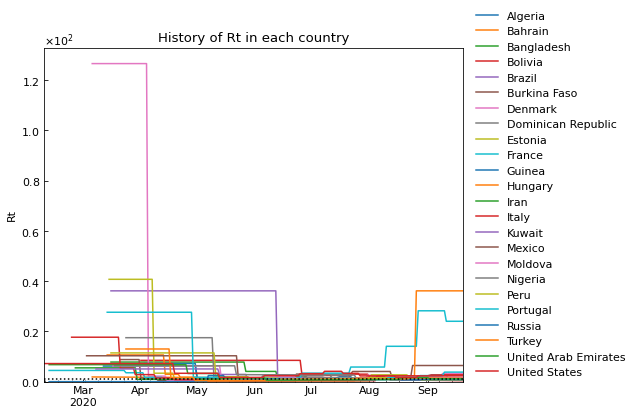

Country,Algeria,Bahrain,Bangladesh,Bolivia,Brazil,Burkina Faso,Denmark,Dominican Republic,Estonia,France,...,Kuwait,Mexico,Moldova,Nigeria,Peru,Portugal,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-16,1.32,1.18,0.64,0.4,1.03,6.44,3.24,1.03,1.67,24.03,...,1.13,0.94,1.81,0.8,0.73,3.81,0.81,1.35,1.15,2.41
2020-09-17,1.32,1.18,0.64,0.4,1.03,6.44,3.24,1.03,1.67,24.03,...,1.13,0.94,1.81,0.8,0.73,3.81,0.81,1.35,1.15,2.41
2020-09-18,1.32,1.18,0.64,0.4,1.03,6.44,3.24,1.03,1.67,24.03,...,1.13,0.94,1.81,0.8,0.73,3.81,0.81,1.35,1.15,2.41
2020-09-19,1.32,1.18,0.64,0.4,1.03,6.44,3.24,1.03,1.67,24.03,...,1.13,0.94,1.81,0.8,0.73,3.81,0.81,1.35,1.15,2.41
2020-09-20,1.32,1.18,0.64,0.4,1.03,6.44,3.24,1.03,1.67,24.03,...,1.13,0.94,1.81,0.8,0.73,3.81,0.81,1.35,1.15,2.41


In [14]:
analyser.param_history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

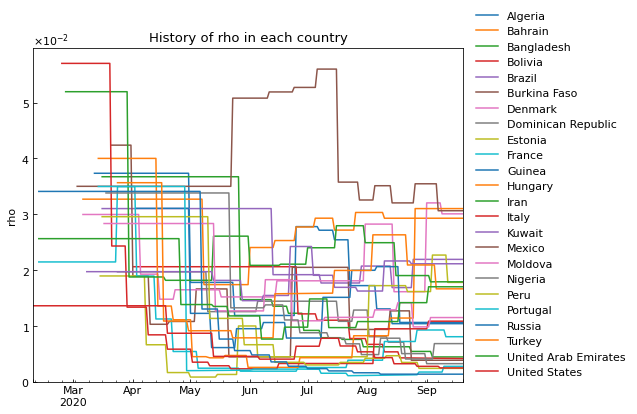

Country,Algeria,Bahrain,Bangladesh,Bolivia,Brazil,Burkina Faso,Denmark,Dominican Republic,Estonia,France,...,Kuwait,Mexico,Moldova,Nigeria,Peru,Portugal,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-16,0.010395,0.029278,0.004435,0.004145,0.021908,0.003842,0.030062,0.006822,0.017785,0.008056,...,0.021123,0.030623,0.01149,0.003231,0.002389,0.002751,0.001347,0.016633,0.017001,0.002468
2020-09-17,0.010395,0.029278,0.004435,0.004145,0.021908,0.003842,0.030062,0.006822,0.017785,0.008056,...,0.021123,0.030623,0.01149,0.003231,0.002389,0.002751,0.001347,0.016633,0.017001,0.002468
2020-09-18,0.010395,0.029278,0.004435,0.004145,0.021908,0.003842,0.030062,0.006822,0.017785,0.008056,...,0.021123,0.030623,0.01149,0.003231,0.002389,0.002751,0.001347,0.016633,0.017001,0.002468
2020-09-19,0.010395,0.029278,0.004435,0.004145,0.021908,0.003842,0.030062,0.006822,0.017785,0.008056,...,0.021123,0.030623,0.01149,0.003231,0.002389,0.002751,0.001347,0.016633,0.017001,0.002468
2020-09-20,0.010395,0.029278,0.004435,0.004145,0.021908,0.003842,0.030062,0.006822,0.017785,0.008056,...,0.021123,0.030623,0.01149,0.003231,0.002389,0.002751,0.001347,0.016633,0.017001,0.002468


In [15]:
analyser.param_history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

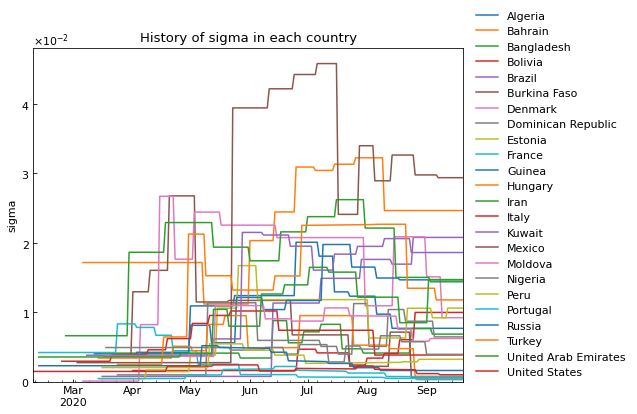

Country,Algeria,Bahrain,Bangladesh,Bolivia,Brazil,Burkina Faso,Denmark,Dominican Republic,Estonia,France,...,Kuwait,Mexico,Moldova,Nigeria,Peru,Portugal,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-16,0.007685,0.024641,0.006852,0.009972,0.020773,0.000546,0.009214,0.006452,0.010599,0.000295,...,0.018597,0.029372,0.006223,0.003939,0.003223,0.000709,0.001615,0.011776,0.014704,0.000997
2020-09-17,0.007685,0.024641,0.006852,0.009972,0.020773,0.000546,0.009214,0.006452,0.010599,0.000295,...,0.018597,0.029372,0.006223,0.003939,0.003223,0.000709,0.001615,0.011776,0.014704,0.000997
2020-09-18,0.007685,0.024641,0.006852,0.009972,0.020773,0.000546,0.009214,0.006452,0.010599,0.000295,...,0.018597,0.029372,0.006223,0.003939,0.003223,0.000709,0.001615,0.011776,0.014704,0.000997
2020-09-19,0.007685,0.024641,0.006852,0.009972,0.020773,0.000546,0.009214,0.006452,0.010599,0.000295,...,0.018597,0.029372,0.006223,0.003939,0.003223,0.000709,0.001615,0.011776,0.014704,0.000997
2020-09-20,0.007685,0.024641,0.006852,0.009972,0.020773,0.000546,0.009214,0.006452,0.010599,0.000295,...,0.018597,0.029372,0.006223,0.003939,0.003223,0.000709,0.001615,0.011776,0.014704,0.000997


In [16]:
analyser.param_history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

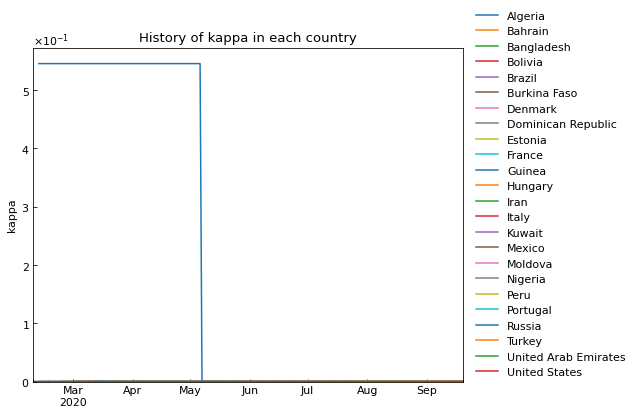

Country,Algeria,Bahrain,Bangladesh,Bolivia,Brazil,Burkina Faso,Denmark,Dominican Republic,Estonia,France,...,Kuwait,Mexico,Moldova,Nigeria,Peru,Portugal,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-16,0.000193,0.000109,0.000076,0.000213,0.000486,0.00005,0.00006,0.000152,0.000037,0.000041,...,0.000046,0.000479,0.000002,0.000033,0.000064,0.00001,0.000041,0.000531,0.000024,0.000024
2020-09-17,0.000193,0.000109,0.000076,0.000213,0.000486,0.00005,0.00006,0.000152,0.000037,0.000041,...,0.000046,0.000479,0.000002,0.000033,0.000064,0.00001,0.000041,0.000531,0.000024,0.000024
2020-09-18,0.000193,0.000109,0.000076,0.000213,0.000486,0.00005,0.00006,0.000152,0.000037,0.000041,...,0.000046,0.000479,0.000002,0.000033,0.000064,0.00001,0.000041,0.000531,0.000024,0.000024
2020-09-19,0.000193,0.000109,0.000076,0.000213,0.000486,0.00005,0.00006,0.000152,0.000037,0.000041,...,0.000046,0.000479,0.000002,0.000033,0.000064,0.00001,0.000041,0.000531,0.000024,0.000024
2020-09-20,0.000193,0.000109,0.000076,0.000213,0.000486,0.00005,0.00006,0.000152,0.000037,0.000041,...,0.000046,0.000479,0.000002,0.000033,0.000064,0.00001,0.000041,0.000531,0.000024,0.000024


In [17]:
analyser.param_history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

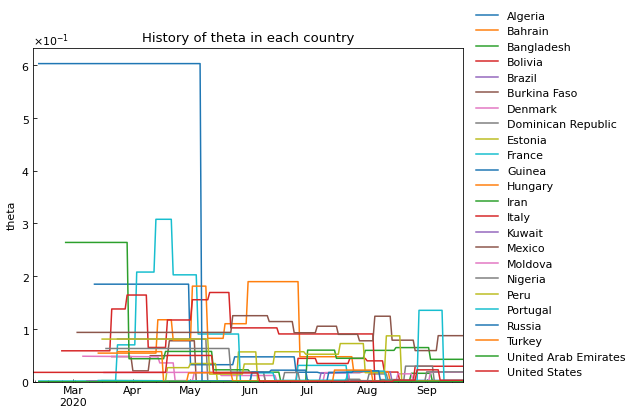

Country,Algeria,Bahrain,Bangladesh,Bolivia,Brazil,Burkina Faso,Denmark,Dominican Republic,Estonia,France,...,Kuwait,Mexico,Moldova,Nigeria,Peru,Portugal,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-16,0.002359,0.00055,0.000548,0.029285,0.001574,0.000233,0.000054,0.000069,0.000661,0.000019,...,0.001252,0.087233,0.017978,0.018608,0.000232,0.002253,0.000055,0.001396,0.000667,0.002788
2020-09-17,0.002359,0.00055,0.000548,0.029285,0.001574,0.000233,0.000054,0.000069,0.000661,0.000019,...,0.001252,0.087233,0.017978,0.018608,0.000232,0.002253,0.000055,0.001396,0.000667,0.002788
2020-09-18,0.002359,0.00055,0.000548,0.029285,0.001574,0.000233,0.000054,0.000069,0.000661,0.000019,...,0.001252,0.087233,0.017978,0.018608,0.000232,0.002253,0.000055,0.001396,0.000667,0.002788
2020-09-19,0.002359,0.00055,0.000548,0.029285,0.001574,0.000233,0.000054,0.000069,0.000661,0.000019,...,0.001252,0.087233,0.017978,0.018608,0.000232,0.002253,0.000055,0.001396,0.000667,0.002788
2020-09-20,0.002359,0.00055,0.000548,0.029285,0.001574,0.000233,0.000054,0.000069,0.000661,0.000019,...,0.001252,0.087233,0.017978,0.018608,0.000232,0.002253,0.000055,0.001396,0.000667,0.002788


In [18]:
analyser.param_history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52035 entries, 0 to 52356
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 52035 non-null  datetime64[ns]
 1   Country                              52035 non-null  object        
 2   Rt                                   52035 non-null  float64       
 3   theta                                52035 non-null  float64       
 4   kappa                                52035 non-null  float64       
 5   rho                                  52035 non-null  float64       
 6   sigma                                52035 non-null  float64       
 7   School_closing                       52035 non-null  int64         
 8   Workplace_closing                    52035 non-null  int64         
 9   Cancel_events                        52035 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.190514,-0.191647,0.208203,-0.174051,-0.035883,0.033623,-0.066840,-0.039699,-0.085924,-0.130236,-0.119757,-0.101479,-0.013811,-0.128347,-0.182623,-0.053297
theta,-0.190514,1.000000,0.978543,0.705562,-0.070418,-0.211813,-0.111739,-0.277064,-0.283561,-0.275564,0.137210,-0.064653,0.140341,-0.344016,-0.301546,0.008528,-0.147705
kappa,-0.191647,0.978543,1.000000,0.692539,-0.118005,-0.246729,-0.151686,-0.294268,-0.279193,-0.278745,0.122093,-0.063021,0.154540,-0.358457,-0.239534,0.009398,-0.184553
rho,0.208203,0.705562,0.692539,1.000000,0.095165,-0.149902,-0.068018,-0.340217,-0.307463,-0.274552,0.096042,-0.144711,0.010753,-0.362115,-0.430114,-0.174446,-0.149446
sigma,-0.174051,-0.070418,-0.118005,0.095165,1.000000,0.155492,0.012357,0.005503,-0.126889,0.029298,-0.014438,-0.107683,-0.026088,0.098902,-0.114842,0.122690,0.074370
School_closing,-0.035883,-0.211813,-0.246729,-0.149902,0.155492,1.000000,0.733495,0.730042,0.651954,0.540773,0.566560,0.526563,0.478453,0.705455,0.412976,0.279793,0.814861
Workplace_closing,0.033623,-0.111739,-0.151686,-0.068018,0.012357,0.733495,1.000000,0.711691,0.756208,0.566183,0.677614,0.649402,0.477252,0.763489,0.448584,0.294395,0.864484
Cancel_events,-0.066840,-0.277064,-0.294268,-0.340217,0.005503,0.730042,0.711691,1.000000,0.798945,0.476226,0.544345,0.636186,0.545734,0.869447,0.592635,0.572522,0.833655
Gatherings_restrictions,-0.039699,-0.283561,-0.279193,-0.307463,-0.126889,0.651954,0.756208,0.798945,1.000000,0.677888,0.647706,0.738388,0.594409,0.811450,0.626758,0.380665,0.861065
Transport_closing,-0.085924,-0.275564,-0.278745,-0.274552,0.029298,0.540773,0.566183,0.476226,0.677888,1.000000,0.592822,0.657204,0.532023,0.510911,0.334064,0.158527,0.744403


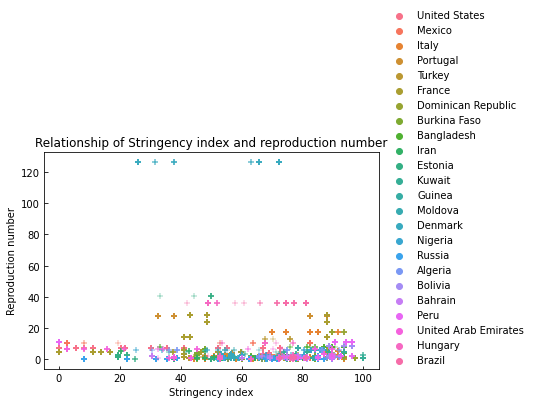

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()